### Max Independent Set (Proven Hard)

In [1]:
file_path = "../mis_datasets/1dc.64.txt"

In [2]:
import numpy as np
from docplex.mp.model import Model

def read_graph_from_file(file_path):
    """
    Reads a graph from a text file and returns the number of nodes, edges, and edge list.

    Parameters:
    - file_path: str, path to the text file containing the graph definition.

    Returns:
    - num_nodes: int, number of nodes in the graph.
    - edges: list of tuple, list of edges in the graph.
    """
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if parts[0] == 'p':
                num_nodes = int(parts[2])
                num_edges = int(parts[3])
            elif parts[0] == 'e':
                u = int(parts[1]) - 1  # Convert to 0-based index
                v = int(parts[2]) - 1  # Convert to 0-based index
                edges.append((u, v))
    return num_nodes, edges

def create_max_independent_set_model(num_nodes, edges):
    """
    Creates a CPLEX model for the Maximum Independent Set (MIS) problem.

    Parameters:
    - num_nodes: int, the number of nodes in the graph.
    - edges: list of tuple, list of edges in the graph.

    Returns:
    - model: CPLEX model.
    - x: list of CPLEX binary variables representing node selection.
    """
    # Create CPLEX model
    model = Model(name="Maximum Independent Set")

    # Decision variables: x[i] = 1 if node i is in the independent set, 0 otherwise
    x = model.binary_var_list(num_nodes, name="x")

    # Objective: Maximize the number of selected nodes
    model.maximize(model.sum(x[i] for i in range(num_nodes)))

    # Constraints: At most one endpoint of each edge can be in the independent set
    for u, v in edges:
        model.add_constraint(x[u] + x[v] <= 1, f"edge_constraint_{u}_{v}")

    return model, x

# Example usage
if __name__ == "__main__":
    file_path = file_path  # Replace with the path to your graph file

    # Read the graph from the file
    num_nodes, edges = read_graph_from_file(file_path)

    # Create the MIS model
    model, x = create_max_independent_set_model(num_nodes, edges)

    # Print model summary
    print(model.export_as_lp_string())

    # Solve the model
    solution = model.solve()

    if solution:
        print("Objective value (size of independent set):", solution.objective_value)
        independent_set = [i + 1 for i in range(num_nodes) if x[i].solution_value > 0.5]  # Convert back to 1-based index
        print("Nodes in the maximum independent set:", independent_set)
    else:
        print("No solution found.")


\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Maximum Independent Set

Maximize
 obj: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11
      + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18 + x_19 + x_20 + x_21
      + x_22 + x_23 + x_24 + x_25 + x_26 + x_27 + x_28 + x_29 + x_30 + x_31
      + x_32 + x_33 + x_34 + x_35 + x_36 + x_37 + x_38 + x_39 + x_40 + x_41
      + x_42 + x_43 + x_44 + x_45 + x_46 + x_47 + x_48 + x_49 + x_50 + x_51
      + x_52 + x_53 + x_54 + x_55 + x_56 + x_57 + x_58 + x_59 + x_60 + x_61
      + x_62 + x_63
Subject To
 _edge_constraint_0_1: x_0 + x_1 <= 1
 _edge_constraint_0_2: x_0 + x_2 <= 1
 _edge_constraint_0_4: x_0 + x_4 <= 1
 _edge_constraint_0_8: x_0 + x_8 <= 1
 _edge_constraint_0_16: x_0 + x_16 <= 1
 _edge_constraint_0_32: x_0 + x_32 <= 1
 _edge_constraint_1_2: x_1 + x_2 <= 1
 _edge_constraint_1_3: x_1 + x_3 <= 1
 _edge_constraint_1_4: x_1 + x_4 <= 1
 _edge_constraint_1_5: x_1 + x_5 <= 1
 _edge_constra

In [3]:
# print the model
print(model.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Maximum Independent Set

Maximize
 obj: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11
      + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18 + x_19 + x_20 + x_21
      + x_22 + x_23 + x_24 + x_25 + x_26 + x_27 + x_28 + x_29 + x_30 + x_31
      + x_32 + x_33 + x_34 + x_35 + x_36 + x_37 + x_38 + x_39 + x_40 + x_41
      + x_42 + x_43 + x_44 + x_45 + x_46 + x_47 + x_48 + x_49 + x_50 + x_51
      + x_52 + x_53 + x_54 + x_55 + x_56 + x_57 + x_58 + x_59 + x_60 + x_61
      + x_62 + x_63
Subject To
 _edge_constraint_0_1: x_0 + x_1 <= 1
 _edge_constraint_0_2: x_0 + x_2 <= 1
 _edge_constraint_0_4: x_0 + x_4 <= 1
 _edge_constraint_0_8: x_0 + x_8 <= 1
 _edge_constraint_0_16: x_0 + x_16 <= 1
 _edge_constraint_0_32: x_0 + x_32 <= 1
 _edge_constraint_1_2: x_1 + x_2 <= 1
 _edge_constraint_1_3: x_1 + x_3 <= 1
 _edge_constraint_1_4: x_1 + x_4 <= 1
 _edge_constraint_1_5: x_1 + x_5 <= 1
 _edge_constra

In [5]:
import os
import json
import numpy as np
from docplex.mp.model import Model
import io
import time
import os
import json
import sys
import numpy as np
from docplex.mp.model import Model
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit.primitives import StatevectorEstimator, StatevectorSampler

estimator = StatevectorEstimator()

In [6]:
qp = from_docplex_mp(model)
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Maximum Independent Set

Maximize
 obj: x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11
      + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18 + x_19 + x_20 + x_21
      + x_22 + x_23 + x_24 + x_25 + x_26 + x_27 + x_28 + x_29 + x_30 + x_31
      + x_32 + x_33 + x_34 + x_35 + x_36 + x_37 + x_38 + x_39 + x_40 + x_41
      + x_42 + x_43 + x_44 + x_45 + x_46 + x_47 + x_48 + x_49 + x_50 + x_51
      + x_52 + x_53 + x_54 + x_55 + x_56 + x_57 + x_58 + x_59 + x_60 + x_61
      + x_62 + x_63
Subject To
 _edge_constraint_0_1: x_0 + x_1 <= 1
 _edge_constraint_0_2: x_0 + x_2 <= 1
 _edge_constraint_0_4: x_0 + x_4 <= 1
 _edge_constraint_0_8: x_0 + x_8 <= 1
 _edge_constraint_0_16: x_0 + x_16 <= 1
 _edge_constraint_0_32: x_0 + x_32 <= 1
 _edge_constraint_1_2: x_1 + x_2 <= 1
 _edge_constraint_1_3: x_1 + x_3 <= 1
 _edge_constraint_1_4: x_1 + x_4 <= 1
 _edge_constraint_1_5: x_1 + x_5 <= 1
 _edge_constra

In [7]:
converter = QuadraticProgramToQubo()
qubo = converter.convert(qp)

print(qubo.export_as_lp_string())


\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Maximum Independent Set

Minimize
 obj: - x_0 - x_1 - x_2 - x_3 - x_4 - x_5 - x_6 - x_7 - x_8 - x_9 - x_10 - x_11
      - x_12 - x_13 - x_14 - x_15 - x_16 - x_17 - x_18 - x_19 - x_20 - x_21
      - x_22 - x_23 - x_24 - x_25 - x_26 - x_27 - x_28 - x_29 - x_30 - x_31
      - x_32 - x_33 - x_34 - x_35 - x_36 - x_37 - x_38 - x_39 - x_40 - x_41
      - x_42 - x_43 - x_44 - x_45 - x_46 - x_47 - x_48 - x_49 - x_50 - x_51
      - x_52 - x_53 - x_54 - x_55 - x_56 - x_57 - x_58 - x_59 - x_60 - x_61
      - x_62 - x_63 + [ 130 x_0*x_1 + 130 x_0*x_2 + 130 x_0*x_4 + 130 x_0*x_8
      + 130 x_0*x_16 + 130 x_0*x_32 + 130 x_1*x_2 + 130 x_1*x_3 + 130 x_1*x_4
      + 130 x_1*x_5 + 130 x_1*x_8 + 130 x_1*x_9 + 130 x_1*x_16 + 130 x_1*x_17
      + 130 x_1*x_32 + 130 x_1*x_33 + 130 x_2*x_3 + 130 x_2*x_4 + 130 x_2*x_5
      + 130 x_2*x_6 + 130 x_2*x_8 + 130 x_2*x_9 + 130 x_2*x_10 + 130 x_2*x_16
      + 130 x_2*x_17 + 130 x_2*x_18 +

In [8]:
# number of variables
num_vars = qubo.get_num_vars()
print('Number of variables:', num_vars)


Number of variables: 64


### **QAOA**

In [9]:
# necessary imports
import os
import json
import glob
import sys
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
from docplex.mp.model import Model

# quantum imports
import qiskit
print("Qiskit Version:",qiskit.__version__)
from qiskit.circuit import ParameterVector, QuantumCircuit
from qiskit.circuit.library import PauliEvolutionGate
from qiskit_optimization.translators import from_docplex_mp
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA,POWELL,SLSQP,P_BFGS,ADAM,SPSA
from qiskit.primitives import StatevectorEstimator, StatevectorSampler
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit_aer import AerSimulator
from qiskit.primitives import BackendEstimator, BackendSampler
from qiskit.primitives import BackendEstimatorV2, BackendSamplerV2

backend = AerSimulator(method='matrix_product_state')
# qrao imports
from qiskit_optimization.algorithms.qrao import QuantumRandomAccessEncoding
from qiskit.circuit.library import RealAmplitudes, EfficientSU2
from qiskit_optimization.algorithms.qrao import (
    QuantumRandomAccessOptimizer,
    SemideterministicRounding,
)
from qiskit_optimization.algorithms.qrao import MagicRounding


estimator = BackendEstimatorV2(backend=backend)
sampler = BackendSamplerV2(backend=backend)

Qiskit Version: 1.2.4


In [10]:
sys.path.append(os.path.abspath(os.path.join('../..')))
from pce_qubo.pauli_correlation_encoding import PauliCorrelationEncoding
from pce_qubo.mixed_optimize import PauliCorrelationOptimizer

from pce_qubo.utility import Utility
from qiskit.quantum_info import SparsePauliOp, Statevector

In [11]:
"""
Helper Quantum Functions
"""

# function to compute the CVaR

def compute_cvar(probabilities, values, alpha):
    """
    Computes the Conditional Value at Risk (CVaR) for given probabilities, values, and confidence level.
    CVaR is a risk assessment measure that quantifies the expected losses exceeding the Value at Risk (VaR) at a given confidence level.
    Args:
    probabilities (list or array): List or array of probabilities associated with each value.
    values (list or array): List or array of corresponding values.
    alpha (float): Confidence level (between 0 and 1).
    float: The computed CVaR value.
    Example:
    >>> probabilities = [0.1, 0.2, 0.3, 0.4]
    >>> values = [10, 20, 30, 40]
    >>> alpha = 0.95
    >>> compute_cvar(probabilities, values, alpha)
    35.0
    Notes:
    - The function first sorts the values and their corresponding probabilities.
    - It then accumulates the probabilities until the total probability reaches the confidence level alpha.
    - The CVaR is calculated as the weighted average of the values, considering only the top (1-alpha) portion of the distribution.
    
    Auxilliary method to computes CVaR for given probabilities, values, and confidence level.
    
    Attributes:
    - probabilities: list/array of probabilities
    - values: list/array of corresponding values
    - alpha: confidence level
    
    Returns:
    - CVaR
    """
    sorted_indices = np.argsort(values)
    probs = np.array(probabilities)[sorted_indices]
    vals = np.array(values)[sorted_indices]
    cvar = 0
    total_prob = 0
    for i, (p, v) in enumerate(zip(probs, vals)):
        done = False
        if p >= alpha - total_prob:
            p = alpha - total_prob
            done = True
        total_prob += p
        cvar += p * v
    cvar /= total_prob
    return cvar


# function to evaluate the bitstring

def eval_bitstring(H, x):
    """
    Evaluate the objective function for a given bitstring.
    
    Args:
        H (SparsePauliOp): Cost Hamiltonian.
        x (str): Bitstring (e.g., '101').
    
    Returns:
        float: Evaluated objective value.
    """
    # Translate the bitstring to spin representation (+1, -1)
    spins = np.array([(-1) ** int(b) for b in x[::-1]])
    value = 0.0

    # Loop over Pauli terms and compute the objective value
    for pauli, coeff in zip(H.paulis, H.coeffs):
        weight = coeff.real  # Get the real part of the coefficient
        z_indices = np.where(pauli.z)[0]  # Indices of Z operators in the Pauli term
        contribution = weight * np.prod(spins[z_indices])  # Compute contribution
        value += contribution

    return value


# objective function for the gradient to optimize






In [14]:
qp = from_docplex_mp(model)                 # made a quadratic program (qp)
converter = QuadraticProgramToQubo()        # converter for qp to qubo  
qubo = converter.convert(qp)                # the qubo         # print the qubo
num_vars = qubo.get_num_vars()
print("Number of Variables in QUBO:",num_vars)
print("---------------------------------")
print("CVaR VQE")
H, offset = qubo.to_ising()
# make a quantum circuit to solve it 
num_qubits = qubo.get_num_binary_vars()
print(f"Number of qubits: {num_qubits}")

Number of Variables in QUBO: 64
---------------------------------
CVaR VQE
Number of qubits: 64


In [15]:
reps = 1
num_params = 2 * reps * num_qubits
initial_params = np.random.rand(num_params) * 2 * np.pi

print("The Depth of the quantum circuit is",reps,"and the number of parameters are",len(initial_params))


The Depth of the quantum circuit is 1 and the number of parameters are 128


In [16]:
maxiter=1
optimizer = COBYLA(maxiter=maxiter)#ADAM(maxiter=maxiter,amsgrad=True)

In [18]:
class Objective:
    """
    Wrapper for objective function to track the history of evaluations.
    """
    def __init__(self, H, offset, alpha, num_qubits, optimal=None):
        self.history = []
        self.H = H
        self.offset = offset
        self.alpha = alpha
        self.num_qubits = num_qubits
        self.optimal = optimal
        self.opt_history = []
        self.last_counts = {}  # Store the counts from the last circuit execution
        self.counts_history = []  # New attribute to store counts history

    def evaluate(self, thetas):
        """
        Evaluate the CVaR for a given set of parameters. 
        """
        # Create a new circuit
        qc = QuantumCircuit(num_qubits)

        # Create a single ParameterVector for all parameters
        theta = ParameterVector('theta', 2 * reps * num_qubits)

        # Build the circuit
        for r in range(reps):
            # Rotation layer of RY gates
            for i in range(num_qubits):
                qc.ry(theta[r * 2 * num_qubits + i], i)
            
            # Rotation layer of RZ gates
            for i in range(num_qubits):
                qc.rz(theta[r * 2 * num_qubits + num_qubits + i], i)
            
            # Entangling layer of CNOT gates
            if r < reps - 1:  # Add entanglement only between layers
                for i in range(num_qubits - 1):
                    qc.cx(i, i + 1)

        # Add measurement gates
        qc.measure_all()
        qc = qc.assign_parameters(thetas)


        
        ############

        
        job = sampler.run([qc])
        result = job.result()
        data_pub = result[0].data
        self.last_counts = data_pub.meas.get_counts()  # Store counts
        self.counts_history.append(self.last_counts)
        
        # Evaluate counts
        probabilities = np.array(list(self.last_counts.values()), dtype=float)  # Ensure float array
        values = np.zeros(len(self.last_counts), dtype=float)
        
        for i, x in enumerate(self.last_counts.keys()):
            values[i] = eval_bitstring(self.H, x) + self.offset
        
        # Normalize probabilities
        probabilities /= probabilities.sum()  # No more dtype issue

        # Track optimal probability
        if self.optimal:
            indices = np.where(values <= self.optimal + 1e-8)
            self.opt_history.append(sum(probabilities[indices]))
        
        # Compute CVaR
        cvar = compute_cvar(probabilities, values, self.alpha)
        self.history.append(cvar)
        return cvar


In [23]:
# Initialize a dictionary to store results
cvar_histories = {}
optimal_bitstrings = {}  # To store the best bitstring for each alpha
optimal_values = {}  # To store the best objective value for each alpha

# Optimization loop
start_time = time.time()
alphas = [0.25]
objectives = []
optimal_value = 10
for alpha in alphas:
    print(f"Running optimization for alpha = {alpha}")
    obj = Objective(H, offset, alpha, num_qubits, optimal_value)
    optimizer.minimize(fun=obj.evaluate, x0=initial_params)
    objectives.append(obj)
    
    # Store CVaR history for this alpha
    cvar_histories[alpha] = obj.history
    
    # Retrieve the optimal bitstring and objective value
    best_bitstring = None
    best_value = None
    
    
    # Iterate through the counts from the last iteration to find the best bitstring
    for bitstring, probability in obj.last_counts.items():
        value = eval_bitstring(H, bitstring) + offset
        if best_bitstring is None or value < best_value:
            best_bitstring = bitstring
            best_value = value
    bitstring_as_list = [int(bit) for bit in best_bitstring]
    
    optimal_bitstrings[alpha] = bitstring_as_list
    
    optimal_values[alpha] = best_value

end_time = time.time()

# Print the optimal bitstrings and values for each alpha, and also feasibility
print("\nOptimal Bitstrings and Objective Values:")
for alpha in alphas:
    # print(f"Alpha = {alpha}: Bitstring = {optimal_bitstrings[alpha]}, Objective Value = {optimal_values[alpha]}")
    
    # convert to market share solution 
    market_share_bitstring = converter.interpret(optimal_bitstrings[alpha])
    initial_feasible = qp.get_feasibility_info(market_share_bitstring)[0]
    market_share_cost = qp.objective.evaluate(market_share_bitstring)
    print(f"Feasible: {initial_feasible}")
    print(f"Multi Dimension Knapsack cost: {market_share_cost}")
    print(f"Execution time: {end_time - start_time:.2f} seconds")

# check if the solution is feasible
    

output_folder = f"vqe_mis"  # Folder name based on num_products and seed
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist
# Save the results to a text filw in the 3_1_updated_results folder
results_file = os.path.join(output_folder, "mdkp_results_new.txt")
with open(results_file, "w") as f:
    f.write("Optimal Bitstrings and Objective Values:\n")
    for alpha in alphas:
        # f.write(f"Alpha = {alpha}: Bitstring = {optimal_bitstrings[alpha]}, Objective Value = {optimal_values[alpha]}\n")
        print(f"Alpha = {alpha}: Bitstring = {converter.interpret(optimal_bitstrings[alpha])}, Objective Value = {qp.objective.evaluate(converter.interpret(optimal_bitstrings[alpha]))}")
        f.write(f"Alpha = {alpha}: Bitstring = {converter.interpret(optimal_bitstrings[alpha])}, Objective Value = {qp.objective.evaluate(converter.interpret(optimal_bitstrings[alpha]))}\n")
    f.write("\nCVaR Histories:\n")
    for alpha, history in cvar_histories.items():
        f.write(f"Alpha = {alpha}: {history}\n")




print("VQE Finished")
print("-------------------------------------")

Running optimization for alpha = 0.25

Optimal Bitstrings and Objective Values:
Feasible: False
Multi Dimension Knapsack cost: 28.0
Execution time: 7.34 seconds
Alpha = 0.25: Bitstring = [1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.], Objective Value = 28.0
VQE Finished
-------------------------------------


### **PCE**

In [14]:
pauli_encoder = PauliCorrelationEncoding()
k = 2
num_qubits = pauli_encoder.find_n(num_vars, k)
pauli_strings = SparsePauliOp(pauli_encoder.generate_pauli_strings(num_qubits, num_vars, k))
print(f"Number of qubits: {num_qubits} for k={k} with {num_vars} binary variables")

Number of qubits: 8 for k=2 with 64 binary variables


In [15]:
from qiskit_algorithms.optimizers import ADAM, POWELL, SLSQP, COBYLA, P_BFGS

In [16]:
# Initial setup
depth = 2 * num_qubits
ansatz = pauli_encoder.BrickWork(depth=depth, num_qubits=num_qubits)
optimizer = SLSQP(20) #P_BFGS() #
# optimizer = POWELL()

In [17]:
pce = PauliCorrelationOptimizer(pauli_encoder=pauli_encoder, depth = depth,qubo=qubo, k=k,
                                num_qubits=num_qubits)

INFO:__main__:Step 1: Initializing parameters and variables.
INFO:__main__:Using SLSQP optimizer.
INFO:__main__:Early stopping configured with fixed_threshold=50 and percentage_threshold=0.10%.
INFO:__main__:
--- Round 1 ---
INFO:__main__:Assigning optimized parameters to the ansatz...
INFO:__main__:Evaluating the QUBO cost and bitstring...
INFO:__main__:QUBO cost for this round: 9067.0
INFO:__main__:Market share cost: 33.0
INFO:__main__:Initial feasibility: (False, [], [<LinearConstraint: x_0 + x_8 <= 1 'edge_constraint_0_8'>, <LinearConstraint: x_0 + x_32 <= 1 'edge_constraint_0_32'>, <LinearConstraint: x_3 + x_6 <= 1 'edge_constraint_3_6'>, <LinearConstraint: x_3 + x_9 <= 1 'edge_constraint_3_9'>, <LinearConstraint: x_17 + x_3 <= 1 'edge_constraint_3_17'>, <LinearConstraint: x_3 + x_35 <= 1 'edge_constraint_3_35'>, <LinearConstraint: x_10 + x_6 <= 1 'edge_constraint_6_10'>, <LinearConstraint: x_12 + x_6 <= 1 'edge_constraint_6_12'>, <LinearConstraint: x_13 + x_6 <= 1 'edge_constrain

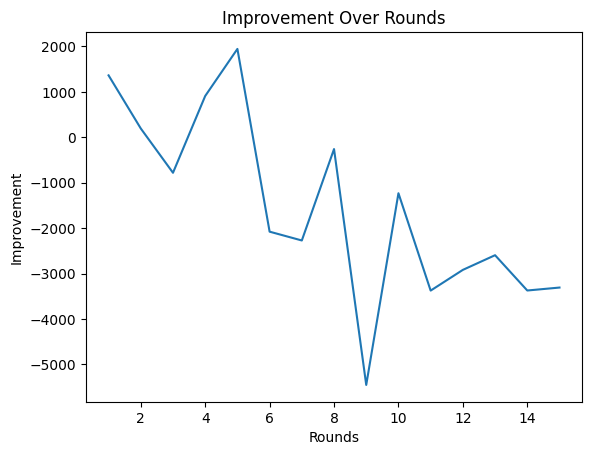

In [18]:
import numpy as np
import logging
import matplotlib.pyplot as plt
import pickle

# Setup logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Functions
def adaptive_perturbation(params, perturbation_factor, failure_count, historical_trend, max_factor=1e-2):
    """Adds directional and random perturbation based on historical trends."""
    random_perturbation = np.random.normal(0, perturbation_factor * (1 + failure_count / 5), size=params.shape)
    directional_perturbation = perturbation_factor * np.sign(historical_trend)
    return params + random_perturbation + directional_perturbation

def weighted_blended_initialization(previous_params, performance_weights, blend_factor=0.7):
    """Blends previous parameters with random ones, weighted by performance."""
    random_params = np.random.rand(len(previous_params))
    weighted_params = performance_weights * previous_params
    return blend_factor * weighted_params + (1 - blend_factor) * random_params

def initialize_within_range(num_params, lower_bound=-np.pi, upper_bound=np.pi):
    """Initializes parameters uniformly within a specified range."""
    return np.random.uniform(lower_bound, upper_bound, size=num_params)

def history_based_cooling_schedule(temperature, alpha, improvement_history, window=5):
    """Dynamically adjusts cooling based on recent improvement trends."""
    if len(improvement_history) >= window:
        recent_trend = sum(improvement_history[-window:])
        if recent_trend > 0:
            alpha = min(alpha * 1.05, 0.99)
        else:
            alpha = max(alpha * 0.95, 0.8)
    return max(temperature * alpha, 1e-8)

def save_checkpoint(filename, params, cost, round_num):
    """Saves the current state of optimization."""
    checkpoint = {'params': params, 'cost': cost, 'round_num': round_num}
    with open(filename, 'wb') as f:
        pickle.dump(checkpoint, f)

def load_checkpoint(filename):
    """Loads a saved optimization state."""
    with open(filename, 'rb') as f:
        return pickle.load(f)

def evaluate_perturbed_params(params, perturbation_factor, optimizer, pce, no_improvement_count, historical_trend):
    """Evaluate a perturbed parameter set and return both parameters and QUBO cost."""
    perturbed_params = adaptive_perturbation(params, perturbation_factor, no_improvement_count, historical_trend)
    optimized_params = pce.optimize(optimizer, perturbed_params)  # Perform optimization

    # Evaluate the QUBO cost for the optimized parameters
    final_ansatz = pauli_encoder.BrickWork(depth=depth, num_qubits=num_qubits).assign_parameters(optimized_params)
    psi_final = Statevector(final_ansatz)
    utility = Utility()
    qubo_bitstring = utility.evaluate_sign_function(psi_final, pauli_strings)
    qubo_cost = qubo.objective.evaluate(qubo_bitstring)

    return optimized_params, qubo_cost

# Initialization
logger.info("Step 1: Initializing parameters and variables.")
params = initialize_within_range(ansatz.num_parameters)
best_params = params.copy()  # Store the best parameters
best_qubo_cost = float('inf')  # Initialize best QUBO cost to infinity
best_qubo_bitstring = None  # Initialize best QUBO bitstring
no_improvement_count = 0  # Counter for consecutive rounds without improvement
max_no_improvement_rounds = 10  # Stop after 10 consecutive rounds without improvement
perturbation_factor = 1e-4  # Initial perturbation factor
decay_factor = 0.99  # Decay factor for perturbation
early_stopping_threshold = 1e-6  # Threshold for minimal improvement
fixed_threshold = 50  # Fixed improvement threshold
percentage_threshold = 0.001  # 0.1% of the best QUBO cost
improvement_history = []  # Track improvements for plotting
cumulative_improvement = 0  # Track cumulative improvement
historical_trend = np.zeros_like(params)  # Track parameter improvement trend
performance_weights = np.ones_like(params)  # Initialize performance weights

# Logging optimizer information
logger.info(f"Using {optimizer.__class__.__name__} optimizer.")
logger.info(f"Early stopping configured with fixed_threshold={fixed_threshold} and percentage_threshold={percentage_threshold * 100:.2f}%.")

round_num = 0
last_improvement_round = 0  # Track the round where the last significant improvement occurred

while no_improvement_count < max_no_improvement_rounds:
    round_num += 1
    logger.info(f"\n--- Round {round_num} ---")

    # Evaluate perturbations sequentially
    best_parallel_cost = float('inf')
    best_result = None

    for _ in range(4):  # Evaluate 4 perturbations sequentially
        result, qubo_cost = evaluate_perturbed_params(
            params, perturbation_factor, optimizer, pce, no_improvement_count, historical_trend
        )
        if qubo_cost < best_parallel_cost:
            best_parallel_cost = qubo_cost
            best_result = result

    result = best_result  # Use the best result from evaluations

    # Prepare the ansatz with the optimized parameters
    logger.info("Assigning optimized parameters to the ansatz...")
    final_ansatz = pauli_encoder.BrickWork(depth=depth, num_qubits=num_qubits).assign_parameters(result)
    psi_final = Statevector(final_ansatz)

    # Evaluate the QUBO cost and bitstring
    logger.info("Evaluating the QUBO cost and bitstring...")
    utility = Utility()
    qubo_bitstring = utility.evaluate_sign_function(psi_final, pauli_strings)
    qubo_cost = qubo.objective.evaluate(qubo_bitstring)
    logger.info(f"QUBO cost for this round: {qubo_cost}")
    market_share_bitstring = converter.interpret(qubo_bitstring)
    initial_feasible = qp.get_feasibility_info(market_share_bitstring)
    market_share_cost = qp.objective.evaluate(market_share_bitstring)
    logger.info(f"Market share cost: {market_share_cost}")
    logger.info(f"Initial feasibility: {initial_feasible}")

    # Check if the QUBO cost improved
    improvement = best_qubo_cost - qubo_cost
    improvement_history.append(improvement)
    cumulative_improvement += improvement
    historical_trend = np.sign(result - params) * improvement

    # Calculate dynamic threshold
    dynamic_threshold = max(fixed_threshold, percentage_threshold * best_qubo_cost)

    # Check if |qubo_cost| equals market_share_cost
    if abs(qubo_cost) == market_share_cost:
        logger.info(f"Stopping condition met: |QUBO cost| equals Market Share Cost.")
        logger.info(f"Final QUBO cost: {qubo_cost}, Market Share Cost: {market_share_cost}.")
        break

    if qubo_cost < best_qubo_cost:
        logger.info(f"Improvement detected! Previous best QUBO cost: {best_qubo_cost}, Current QUBO cost: {qubo_cost}")
        best_qubo_cost = qubo_cost
        best_params = result.copy()  # Save the best parameters
        best_qubo_bitstring = qubo_bitstring.copy()  # Save the best bitstring
        no_improvement_count = 0  # Reset no improvement counter
        perturbation_factor *= decay_factor  # Decay perturbation factor for precision
        last_improvement_round = round_num  # Update last improvement round

        # Perturb the trained parameters slightly
        logger.info("Perturbing the best parameters slightly for the next round.")
        params = adaptive_perturbation(best_params, perturbation_factor, no_improvement_count, historical_trend)
    else:
        logger.info(f"No improvement this round. Previous best QUBO cost remains: {best_qubo_cost}")
        no_improvement_count += 1

        # Apply perturbation or blended initialization
        if no_improvement_count % 2 == 0:
            logger.info("Applying blended initialization to explore new solutions.")
            params = weighted_blended_initialization(best_params, performance_weights)
        else:
            logger.info("Applying stronger perturbation to the best parameters.")
            params = adaptive_perturbation(best_params, perturbation_factor * 2, no_improvement_count, historical_trend)

    # Stop if no improvement for max_no_improvement_rounds consecutive rounds
    rounds_remaining = max_no_improvement_rounds - no_improvement_count
    logger.info(f"Consecutive no-improvement rounds: {no_improvement_count}. Rounds remaining before stopping: {rounds_remaining}.")

    if no_improvement_count >= max_no_improvement_rounds:
        logger.info(f"No improvement detected for {max_no_improvement_rounds} consecutive rounds.")
        logger.info(f"Early stopping triggered at round {round_num}.")
        break

    # Save checkpoints
    save_checkpoint("optimization_checkpoint.pkl", best_params, best_qubo_cost, round_num)

# Final Results
logger.info("\nOptimization complete.")
logger.info(f"Best QUBO cost: {best_qubo_cost}")
logger.info(f"Best QUBO bitstring: {best_qubo_bitstring}")
market_share_bitstring = converter.interpret(best_qubo_bitstring)
initial_feasible = qp.get_feasibility_info(market_share_bitstring)
market_share_cost = qp.objective.evaluate(market_share_bitstring)
logger.info(f"Market share cost: {market_share_cost}")


logger.info(f"Final feasibility: {initial_feasible}")

# Plot improvement history
plt.plot(improvement_history)
plt.title("Improvement Over Rounds")
plt.xlabel("Rounds")
plt.ylabel("Improvement")
# save the plot
plt.savefig("improvement_history.png")
plt.show()
